<a href="https://colab.research.google.com/github/NatBarbosa/CCG2021_Python-para-geolog-s/blob/main/4_Integracion_de_datos_script_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

0. LIBRERIAS

Las librerias para integrar datos raster y vectoriales incluyen:

1. Las previamente usadas para la manipulacion de datos raster

Numpy -- https://numpy.org/

Matplotlib -- https://matplotlib.org/

Gdal -- https://gdal.org/

Rasterio -- https://rasterio.readthedocs.io/en/latest/intro.html#

Glob -- https://docs.python.org/3/library/glob.html

2. Librerias disenadas para la manipulacion de datos vectoriales 

Geopandas - lectura y manipulacion de datos vectoriales -- https://geopandas.org/

shapely - https://shapely.readthedocs.io/en/stable/manual.html

Geopandas no esta previamente instalada en collab!

In [ ]:
%pip install rasterio
%pip install geopandas

     |████████████████████████████████| 19.3 MB 77.2 MB/s 
     |████████████████████████████████| 994 kB 4.3 MB/s 
     |████████████████████████████████| 15.4 MB 37 kB/s 
     |████████████████████████████████| 6.6 MB 47.8 MB/s 


In [ ]:
# Importar todas las librerias
import numpy as np
import rasterio
import os
# Read data from google drive
from google.colab import drive
import copy
import glob
from matplotlib import pyplot as plt
from osgeo import gdal

In [ ]:
#Mount your drive to conect with Colab
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Directorio inicial
cwd = os.getcwd()
print("Current working directory: ", cwd)

Current working directory:  /content


# 1. LEER EL DEM 

In [ ]:
#Encontrar el DEM localizado en la subcarpeta Dia1/Ejercicio2
os.chdir("/content/drive/MyDrive/PROJECTS/CCG_2021/CourseData/Dia1/Ejercicio2/")
print(os.listdir(cwd))
cwd = os.getcwd()
print("Current working directory: ", cwd)

['.config', 'drive', 'sample_data']
Current working directory:  /content/drive/MyDrive/PROJECTS/CCG_2021/CourseData/Dia1/Ejercicio2


In [ ]:
#Crear la ruta al DEM
dem_path = os.path.join(cwd, 'AP_20744_FBS_F0060_RT1.dem.tif')

#abrir el archivo con rasterio
dem_open = rasterio.open(dem_path)

In [ ]:
#leerlo como array
dem_array = dem_open.read()
print(f'Forma del areglo original {dem_array.shape}')
#reshape
dem_array = dem_array.reshape(dem_array.shape[1], dem_array.shape[2])
print(f'Forma del areglo modificada {dem_array.shape}')


Forma del areglo original (1, 5732, 6579)
Forma del areglo modificada (5732, 6579)


# 2. LEER LOS DATOS VECTORIALES

Para leer los datos en vector usamos otra libreria llamada *Geopandas*

A diferencia de los datos raster, los datos vectoriales estan estructurados como coordenadas geograficas en el espacio. 

* Punto = unica coordenada (x,y)
* Linea = distancia entre dos puntos
* Poligono = lineas que unen muchos puntos

In [ ]:
import geopandas as gpd

In [ ]:
#Encontrar los datos
directory = '/content/drive/MyDrive/PROJECTS/CCG_2021/CourseData/Dia2/Ejercicio_shapes/'
paths = glob.glob('/content/drive/MyDrive/PROJECTS/CCG_2021/CourseData/Dia2/Ejercicio_shapes/*.shp')
print(paths)

['/content/drive/MyDrive/PROJECTS/CCG_2021/CourseData/Dia2/Ejercicio_shapes/AP_20744_FBS_F0060_RT1.dem_TH_1_LEN_1_MA.shp', '/content/drive/MyDrive/PROJECTS/CCG_2021/CourseData/Dia2/Ejercicio_shapes/catchments@subset_4@AP_20744_FBS_F0060_RT1.dem_TH_1_LEN_1_MA.shp', '/content/drive/MyDrive/PROJECTS/CCG_2021/CourseData/Dia2/Ejercicio_shapes/catchments@subset_3@AP_20744_FBS_F0060_RT1.dem_TH_1_LEN_1_MA.shp']


In [ ]:
rios = gpd.read_file(paths[0])
basins_strahler3 = gpd.read_file(paths[1])
basins_strahler4 = gpd.read_file(paths[2])
print(basins_strahler3.head())

   basin_id                                           geometry
0        42  POLYGON ((502262.938 409636.500, 502275.438 40...
1        22  POLYGON ((475062.938 435961.500, 475075.438 43...
2        43  POLYGON ((498425.438 407561.500, 498437.938 40...
3        23  POLYGON ((525862.938 435111.500, 525875.438 43...
4        24  POLYGON ((526150.438 430324.000, 526137.938 43...


Geopandas lee la inforamcion consignada en un shapefile como una tabla de atributos. Esto se conoce como un 'dataframe'. El dataframe tiene nombres en las columnas que nos sirven para manupular la informacion contenida de una manera muy similar a una tabla de excel.

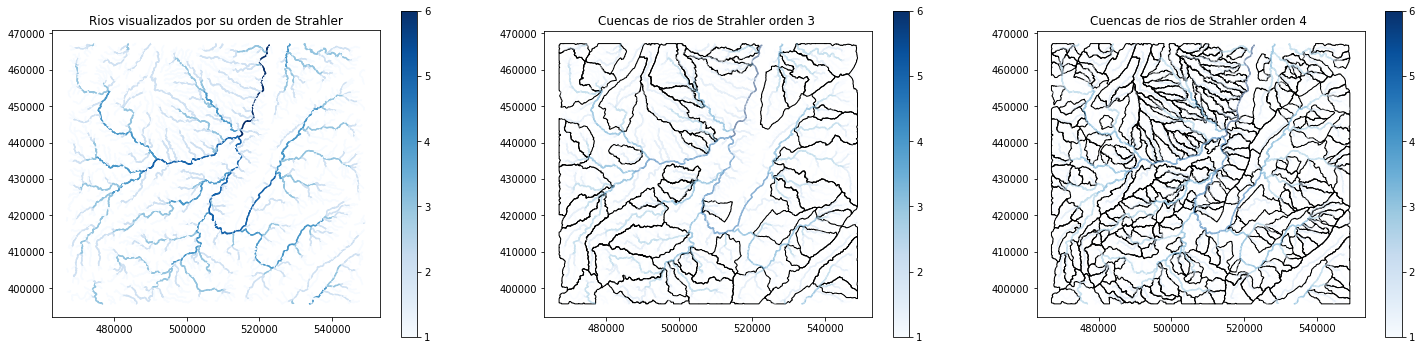

In [ ]:
#Visualizar los rios
fig = plt.figure(figsize=(25,6))
ax1 = plt.subplot(131)
rios.plot(column='Strahler', ax=ax1, cmap='Blues', legend=True)
plt.title('Rios visualizados por su orden de Strahler')

ax2 = plt.subplot(132)
basins_strahler3.plot(ax=ax2, facecolor='none', edgecolor='black')
rios.plot(column='Strahler', ax=ax2, cmap='Blues', legend=True, alpha = 0.5)
plt.title('Cuencas de rios de Strahler orden 3 ')

ax3 = plt.subplot(133)
basins_strahler4.plot(ax=ax3 ,facecolor='none', edgecolor='black')
rios.plot(column='Strahler', ax=ax3, cmap='Blues', legend=True, alpha = 0.5)
plt.title('Cuencas de rios de Strahler orden 4 ')

plt.show()


---
Recap

Para leer datos tipo vector usamos una libreria llamada geopandas que lee la tabla de atributos del vector donde esta contenida la inforamcion geografica

La informacion geografica de los puntos que conforman el poligono es usada para visualizar el shapefile

Se pueden visualizar los diferentes atributos del shapefile cambiando la colummna de visualizacion en los parametros de entrada del metodo de ploteo

---

# 3. COMBINAR DATOS FORMATO RASTER CON DATOS VECTORIALES

Esto no es una operacion directa porque la manera de trabajar datos raster y vectores es muy diferentes. Los raster se almacenan como matrices geograficamente localizadas por un borde (xmin, xmax, ymin, ymax). Los vectores, en cambio, son almacenados como geometrias que contienen multiples coordenadas. 

## 3.1. Informacion geografica del raster

Para visualizar los dos tipos de datos en un mismo plot tenemos que extraer la geotransformada. La geotransformada es la definicion espacial de un raster. Corresponde a un vector de 6 coefficientes. 

* GT(0) x-coordinate of the upper-left corner of the upper-left pixel.
* GT(1) w-e pixel resolution / pixel width.
* GT(2) row rotation (typically zero).
* GT(3) y-coordinate of the upper-left corner of the upper-left pixel.
* GT(4) column rotation (typically zero).
* GT(5) n-s pixel resolution / pixel height (negative value for a north-up image).

In [ ]:
#Extraer coordenadas del DEM - geotransform
geotransformada = dem_open.get_transform()
print(geotransformada)


[466894.1875, 12.5, 0.0, 467255.25, 0.0, -12.5]


In [ ]:
dem_open.profile

{'driver': 'GTiff', 'dtype': 'int16', 'nodata': 0.0, 'width': 6579, 'height': 5732, 'count': 1, 'crs': CRS.from_epsg(32618), 'transform': Affine(12.5, 0.0, 466894.1875,
       0.0, -12.5, 467255.25), 'tiled': False, 'interleave': 'band'}

In [ ]:
#Necesitamos el xmin, xmax = xmin + ncols*pixels size, ymin, ymax= ymin+ nrows*pixels size
extent = (geotransformada[0], geotransformada[0] + dem_open.width * geotransformada[1], geotransformada[3] + dem_open.height * geotransformada[5], geotransformada[3])
print(extent)

(466894.1875, 549131.6875, 395605.25, 467255.25)


## 3.2. Plotear juntos usando Matplotlib

Existen muchas librerias disenadas en plotear vector y raster juntos. En este curso intentamos usar las librerias base para tener mayor libertad de procesamiento y ajustes a nuestras necesidades. 

Para plotear el raster usando su informacion geografica definimos el extent! 


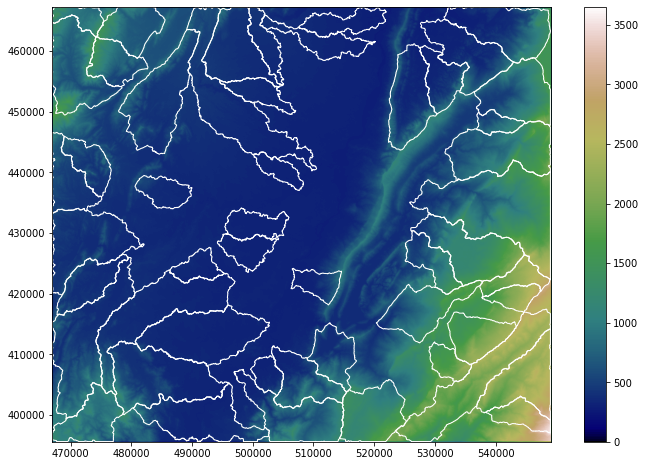

In [ ]:
fig = plt.figure(figsize = (12, 8))
ax1 = plt.subplot(111)
img = plt.imshow(dem_array, extent=extent, origin='upper', cmap = 'gist_earth')
basins_strahler3.plot(ax=ax1,facecolor='none', edgecolor='white')
plt.colorbar(img)
plt.show()

# 4. EXTRAER INFORMACION DEL RASTER USANDO UN AREA DEFINIDA POR UN VECTOR 

Para extraer la informacion por cuenca, el procedimiento es el siguiente:

1. Extraer la geometria de cada una de las cuencas
2. Extraer los valores del raster dentro de la geometria del poligono de la cuenca maskeando los valores del raster que no corresponden con el poligono



In [ ]:
#Geometria de todas las cuencas
basin_id = basins_strahler3.basin_id
geoms = basins_strahler3.geometry.values
print(geoms[:5])
print(basin_id[:5])

<GeometryArray>
Length: 5, dtype: geometry
0    42
1    22
2    43
3    23
4    24
Name: basin_id, dtype: int64


In [ ]:
#print(basins_strahler3)

In [ ]:
#Geometria de la primera cuenca
geometry = geoms[2]
print(geometry)

POLYGON ((498425.4375 407561.5, 498437.9375 407549, 498450.4375 407536.5, 498450.4375 407524, 498462.9375 407511.5, 498462.9375 407499, 498462.9375 407486.5, 498475.4375 407474, 498487.9375 407461.5, 498487.9375 407449, 498487.9375 407436.5, 498487.9375 407424, 498487.9375 407411.5, 498475.4375 407399, 498462.9375 407399, 498450.4375 407399, 498437.9375 407399, 498425.4375 407399, 498412.9375 407399, 498400.4375 407399, 498387.9375 407399, 498375.4375 407399, 498362.9375 407399, 498350.4375 407399, 498337.9375 407386.5, 498337.9375 407374, 498350.4375 407361.5, 498362.9375 407361.5, 498375.4375 407361.5, 498387.9375 407349, 498387.9375 407336.5, 498400.4375 407324, 498412.9375 407311.5, 498425.4375 407299, 498437.9375 407286.5, 498450.4375 407274, 498462.9375 407261.5, 498475.4375 407249, 498487.9375 407236.5, 498500.4375 407224, 498512.9375 407211.5, 498525.4375 407211.5, 498537.9375 407199, 498550.4375 407199, 498562.9375 407199, 498575.4375 407186.5, 498562.9375 407174, 498562.9375 

Nota: 
* Cuenca 0 es una cuenca estable
* Cuenca 2 tiene un knick point 


**shapely** es una libreria disenada para el procesamiento de datos vector y nos permite mapear el poligono en el raster. Shapely usa un formato de intercambio de datos llamado JSON (JavaScript Object Notation). JSON es un formato de texto completamente independiente de lenguaje y es muy usado en el procesamiento de informacion geografica tipo vector.

In [ ]:
from shapely.geometry import mapping
from rasterio.mask import mask

In [ ]:
#Transformar las coordenadas a JSON
geoms_JSON = [mapping(geometry)]
print(geoms_JSON)


[{'type': 'Polygon', 'coordinates': (((498425.4375, 407561.5), (498437.9375, 407549.0), (498450.4375, 407536.5), (498450.4375, 407524.0), (498462.9375, 407511.5), (498462.9375, 407499.0), (498462.9375, 407486.5), (498475.4375, 407474.0), (498487.9375, 407461.5), (498487.9375, 407449.0), (498487.9375, 407436.5), (498487.9375, 407424.0), (498487.9375, 407411.5), (498475.4375, 407399.0), (498462.9375, 407399.0), (498450.4375, 407399.0), (498437.9375, 407399.0), (498425.4375, 407399.0), (498412.9375, 407399.0), (498400.4375, 407399.0), (498387.9375, 407399.0), (498375.4375, 407399.0), (498362.9375, 407399.0), (498350.4375, 407399.0), (498337.9375, 407386.5), (498337.9375, 407374.0), (498350.4375, 407361.5), (498362.9375, 407361.5), (498375.4375, 407361.5), (498387.9375, 407349.0), (498387.9375, 407336.5), (498400.4375, 407324.0), (498412.9375, 407311.5), (498425.4375, 407299.0), (498437.9375, 407286.5), (498450.4375, 407274.0), (498462.9375, 407261.5), (498475.4375, 407249.0), (498487.9375

In [ ]:
#Crear una mascara para los valores del DEM que no pertenecen al poligono
with rasterio.open(dem_path) as src:
     cuenca1, out_transform = mask(src, geoms_JSON, crop=True)

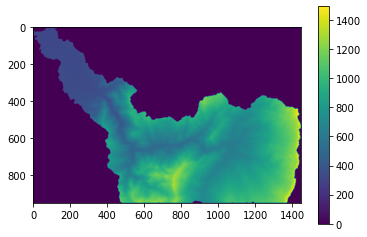

In [ ]:
#Plotear los valores de elevacion en la cuenca 1
plt.imshow(cuenca1.reshape(cuenca1.shape[1], cuenca1.shape[2]))
plt.colorbar()

In [ ]:
#Extraer alturas del raster enmascarado! 
cuenca1_elevacion = cuenca1[np.where(cuenca1 !=0)]
print(f'Las elevaciones de la cuenca son: {cuenca1_elevacion}')

Las elevaciones de la cuenca son: [ 318  318  318 ... 1405 1428 1446]


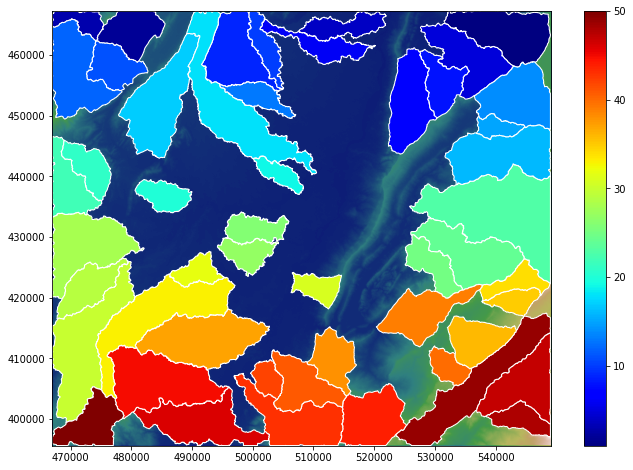

In [ ]:
#Cual es esta cuenca?
fig = plt.figure(figsize = (12, 8))
ax1 = plt.subplot(111)
img = plt.imshow(dem_array, extent=extent, origin='upper', cmap = 'gist_earth')
basins_strahler3.plot(ax=ax1, column='basin_id', edgecolor='white', cmap = 'jet', legend = True)
#plt.colorbar(img)
plt.show()

---
Recap

Para visualizar en un mismo plot datos raster y vector necesitamos usar la informacion geografica de ambos tipos de datos.

La informacion geografica del raster esta consignada en la geotransformada

Para extraer la informacion del raster contenida en una geometria determinada hacemos una mascara de los valores que no se intersectan con la geometria de interes

---

#5.  EJEMPLO - CALCULO DE VARIABLES MORFOMETRICAS DE LA CUENCA 

De manera rapida, vamos a caracteriza esta cuenca.




In [ ]:
#Calcular informacion estadistica sobre la cuenca
h_min = cuenca1_elevacion.min()
h_max = cuenca1_elevacion.max()
basin_area = len(cuenca1_elevacion)*geotransformada[1]*-geotransformada[-1]
h_promedio = cuenca1_elevacion.mean()


In [ ]:
print(f'elevacion minima de la cuenca: {h_min}')
print(f'elevacion minima de la cuenca: {h_max}')
print(f'Area de la cuenca: {basin_area/1000000} en km2')
print(f'Elevacion promedio de la cuenca: {h_promedio} m.s.n.m')

elevacion minima de la cuenca: 316
elevacion minima de la cuenca: 1492
Area de la cuenca: 97.36140625 en km2
Elevacion promedio de la cuenca: 780.1337092951038 m.s.n.m


## 5.1. Frecuencias altimetricas

Las frecuencias altimetricas se usan para describir, en altitudes sucesivas, las frecuencias de ciertos niveles 

 


In [ ]:
#1. Crear un array igualmente espaciado de alturas entre la minima y la maxima en la cuenca
h_range = np.arange(h_min, h_max, 10)

Text(0, 0.5, 'Elevacion: h/H')

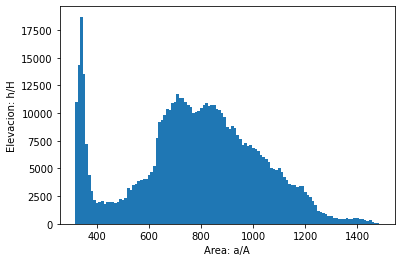

In [ ]:
#Plotear frecuencias altimetricas
fig= plt.figure()
ax1 = plt.subplot(111)
ax1.hist(cuenca1_elevacion, bins = h_range )
ax1.set_xlabel('Area: a/A')
ax1.set_ylabel('Elevacion: h/H')


## 5.2. Curva Hipsometrica

La curva hipsometrica (Strahler 1952) permite conocer la distribucion de masa en la cuenca desde arriba hacia abajo. Se obtiene calculando:
* x como las diferentes alturas alturas de la cuenca referidos a la maxima altura de la misma
* y como los valores de area que se encuentran por encima de las alturas correspondientes, referidos al area total de cuenca. 

De esta forma se utilizan valorse relativos (porcentuales) lo que hace posible comparar curvas de diferentes cuencas.

<img src="https://drive.google.com/uc?export=view&id=1okz5ELENyC8cieaAHupZvgBfhN7AJOO2"  width=200 />




In [ ]:
#2. Calcular el area entre cada intervalo
#Lista vacia para llenar con el area por encima de una altura definida
areas = [] # area absoluta
x = [] # area relativa a la altura maxima de la cuenca
for i in range(len(h_range)):
      pixels = (cuenca1_elevacion>h_range[i]).sum()
      area_range = pixels*geotransformada[1]*-geotransformada[-1]
      areas.append(area_range)
      area_norm = area_range/basin_area
      x.append(area_norm)

In [ ]:
#Normalizar las elevaciones a la maxima elevacion
y = np.divide(h_range, h_max)

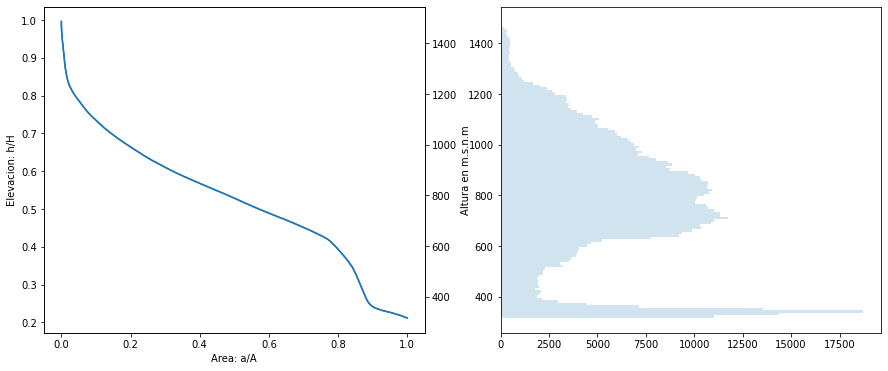

In [ ]:
#Curva hpsometrica
fig= plt.figure(figsize=(15,6))
ax1 = plt.subplot(121)
ax1.plot(x,y)
ax1.set_xlabel('Area: a/A')
ax1.set_ylabel('Elevacion: h/H')

#Plot altitudes
ax2 = ax1.twinx()
ax2.plot(x, h_range)
ax2.set_ylabel('Altura en m.s.n.m')

ax3 = plt.subplot(122)
ax3.hist(cuenca1_elevacion, bins = h_range, orientation='horizontal', alpha=0.2)

plt.show()

## 5.3. Elevacion media

La elevacion media se determina con base en la curva hipsometrica. La elevacion media de la cuenca es el equivalente al 50% del area de la cuenca 

In [ ]:
print(x)

[0.9999646934023203, 0.9803245960203045, 0.956304875680655, 0.9270918757913894, 0.9061550633673187, 0.8949387992226129, 0.8883139976216192, 0.8836599461092932, 0.8802464400518044, 0.8772790810013593, 0.8741207453543739, 0.870825997852717, 0.8679597440592637, 0.8647612872785514, 0.8616783793629726, 0.858553745468318, 0.8555157732225134, 0.8523574375755281, 0.8487898663645278, 0.845313771338425, 0.841483005490176, 0.8362833065591634, 0.8313211247398145, 0.8256207140598896, 0.819718092865981, 0.8134527766231807, 0.8071425247106062, 0.8006910464073129, 0.7941561161458676, 0.786958384755253, 0.7794894345006443, 0.7707430273481696, 0.7580005552764908, 0.743158945488218, 0.7280717943615364, 0.7121629624161268, 0.6954420787240837, 0.6788929134843921, 0.6614145427875843, 0.643557428588394, 0.6247727137774368, 0.606695735765423, 0.5884759265173412, 0.5708274422135311, 0.5537823797609743, 0.5367966965863334, 0.5207386140234597, 0.5045730068221976, 0.48819556003485726, 0.47128530459162304, 0.45398

In [ ]:
elevacion_media = h_range[np.where(np.array(x)==0.5045730068221976)]
print(f'La elevacion media de la cuenca es {elevacion_media}')

La elevacion media de la cuenca es [786]


## 5.4. Indices Hipsometrico

El indice hipsometrico se calcula como.

$$HI = \frac{h_{media} - h_{min} }{ h_{max} - h_{min}} $$



---


<img src="https://drive.google.com/uc?export=view&id=1eP9cBWrHiUkalBGXCBxmtlMEO1AMNhd3"  width=1100 />


In [ ]:
# Indice hipsometrico
Hi = np.divide((elevacion_media-h_min), (h_max - h_min))

In [ ]:
print(HI)

[0.39965986]
